# Linear Regression Project
###### Willi Kristen

#### Herangehensweise an ein lineares Regressionsproblem:
## Prediction of Diamond Prices

###### Data: https://www.kaggle.com/shivam2503/diamonds

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

###### Laden der Trainingsdaten:

In [3]:
df = pd.read_csv("diamonds.csv", index_col="Unnamed: 0")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


###### Datenaufbereitung:
#### -Umwandeln der kategorischen- in numerische Werte (Dummyvariablen)
#### -Filtern redundanter Dummyvariablen

In [4]:
df = pd.get_dummies(df).drop(["cut_Very Good", "color_J", "clarity_I1"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   depth         53940 non-null  float64
 2   table         53940 non-null  float64
 3   price         53940 non-null  int64  
 4   x             53940 non-null  float64
 5   y             53940 non-null  float64
 6   z             53940 non-null  float64
 7   cut_Fair      53940 non-null  uint8  
 8   cut_Good      53940 non-null  uint8  
 9   cut_Ideal     53940 non-null  uint8  
 10  cut_Premium   53940 non-null  uint8  
 11  color_D       53940 non-null  uint8  
 12  color_E       53940 non-null  uint8  
 13  color_F       53940 non-null  uint8  
 14  color_G       53940 non-null  uint8  
 15  color_H       53940 non-null  uint8  
 16  color_I       53940 non-null  uint8  
 17  clarity_IF    53940 non-null  uint8  
 18  clarity_SI1   53940 non-nu

In [5]:
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Frage 1: Welche Features weisen in Bezug zu unserer Target Variablen eine hohe Korrelation auf?

###### Überblick über Korrelationen durch einen Heat-Map Plot:

<AxesSubplot:>

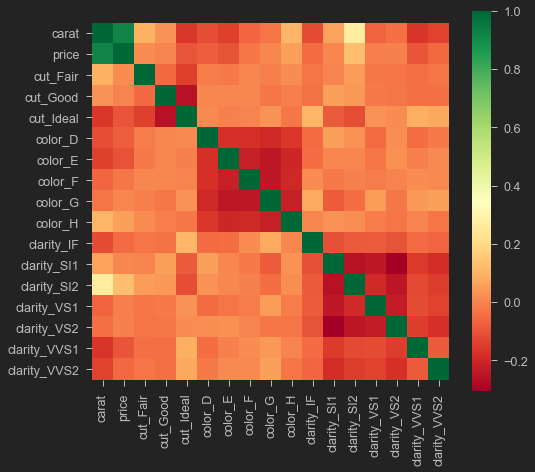

In [26]:
sns.heatmap(df.corr(), square=True, cmap="RdYlGn")

In [7]:
X_carat = df[["x", "y", "z"]]
df = df.drop(["depth", "table", "x", "y", "z", "cut_Premium", "color_I"], axis=1)

###### Aufsplitten des Trainingssets in X (Features) und y (target):

In [8]:
X = df.drop("price", axis=1); y = df["price"].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

###### Anlegen unseres Modells (LinearRegression):

In [10]:
lr = LinearRegression()

###### Ein erster Überblick, über die Genauigkeit des Modells, angewandt auf X, mit Hilfe einer Cross-Validation:

In [11]:
kf =KFold(shuffle=True, random_state=21)
train_scores = cross_val_score(lr, X, y, cv=kf)
print(f'train_score: {np.mean(train_scores)}')

train_score: 0.914182106275302


###### Prüfen, ob wir das vorläufige Ergebniss mit polynomial-transformierten Features signifikant verbessern können (Antwort: Ja):

In [12]:
pf = PolynomialFeatures(include_bias=False)
pf.fit(X)

X_polynomial = pf.transform(X)

poly_train_scores = cross_val_score(lr, X_polynomial, y, cv=kf)
print(f'poly_train_score: {np.mean(poly_train_scores)}')

poly_train_score: 0.9593407357597264


###### Prüfen, ob wir das vorläufige Ergebniss signifikant verbessern können, indem wir die Daten skalieren (Antwort: Nein):

In [13]:
scaler = StandardScaler()
scaler.fit(X_polynomial)
X_polynomial_scaled = scaler.transform(X_polynomial)

scaled_train_scores = cross_val_score(lr, X_polynomial_scaled, y, cv=kf)
print(f'scaled_train_score: {np.mean(scaled_train_scores)}')

scaled_train_score: 0.9594240869087847


###### Polynomiale Transformation, der Trainings- und Testfeatures, sowie das anpassen des Modells an unsere Trainingsdaten:

In [22]:
X_train_poly = pf.transform(X_train)
X_test_poly = pf.transform(X_test)

lr.fit(X_train_poly, y_train)
lr.coef_ # Ausgabe, der berechneten Koeffizienten, für diese lineare Regression:

array([-7.13024285e+03,  1.03567558e+15, -5.50627509e+14, -1.86211769e+14,
        6.81568244e+14,  6.73190113e+14,  2.04004717e+14, -1.02584178e+15,
        4.79722575e+12, -4.20320656e+14,  6.61582574e+14, -1.74521029e+15,
       -1.94006999e+14, -6.38840782e+14, -2.22729334e+15, -1.00130644e+15,
        2.77475000e+03, -1.29403516e+03, -2.31812500e+02,  3.77750000e+02,
        3.78131250e+03,  3.60929688e+03,  3.50646875e+03,  2.71012500e+03,
        1.41198438e+03,  1.18258984e+04,  7.68478125e+03,  5.94715625e+03,
        9.41725000e+03,  8.80275000e+03,  1.09186562e+04,  1.05517188e+04,
       -1.03567558e+15, -5.62846133e+13, -2.08134551e+14, -6.04780762e+02,
       -4.73718262e+02, -5.03173828e+02, -4.77679688e+02, -3.06501953e+02,
       -1.76540686e+03, -2.53109375e+02, -2.11921875e+02, -5.76347168e+02,
       -3.89738281e+02, -2.97067139e+02, -4.92335938e+02,  5.50627509e+14,
        2.32295606e+13, -1.46828125e+02, -4.38437500e+01, -1.19396484e+02,
       -1.19443359e+02,  

#### Frage 2: Können wir den Preis eines Diamanten, anhand der Features, mit Hilfe der linearen Regression bestimmen?

###### Vorhersage der Target-Variablen, auf Grundlage der Testfeatures:

In [31]:
predictions = lr.predict(X_test_poly)
predictions

array([-1.79413557e+01,  3.39628045e+03,  9.84780453e+02, ...,
        1.82649680e+04,  2.61053045e+03,  2.51499203e+02])

###### Akkuratessescore für unser Modell. (Bestimmtheitsmaß: R²)

In [17]:
lr.score(X_test_poly, y_test)

0.9610428447366909

#### Antwort: Wir können den Preis, mit unserem Modell, mit einer Genauigkeit von 96,1% bestimmen!

###### Betrachtung der erzielten Ergebnisse unseres Modells in einem:
   ###### 1. QQ-Plot
   ###### 2. Histogramm der prozentualen Abweichung von y

In [62]:
predictions = np.rint(predictions)
results_dict={"Actual_Price": y_test, 
              "Model_Prediction": predictions, 
              "Difference_(abs)": y_test - predictions, 
              "Difference_(%)": np.rint((y_test - predictions) / y_test * 100)}
results_df = pd.DataFrame(results_dict)
results_df.head()

,Actual_Price,Model_Prediction,Difference_(abs),Difference_(%)
0,544,-18.0,562.0,103.0
1,2400,3396.0,-996.0,-42.0
2,1046,985.0,61.0,6.0
3,683,610.0,73.0,11.0
4,4020,4088.0,-68.0,-2.0


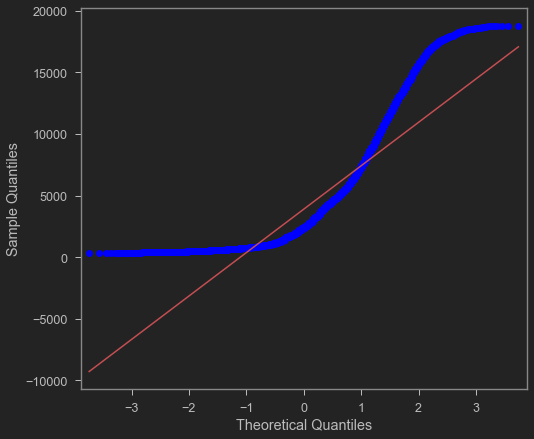

In [74]:
sm.qqplot(results_df["Actual_Price"], line ='r')
plt.show()

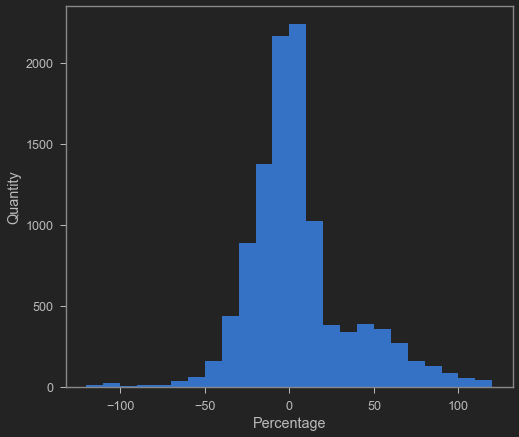

In [70]:
plt.hist(results_df["Difference_(%)"], bins=24, range=(-120, 120))  
plt.ylabel('Quantity')
plt.xlabel('Percentage');